# Introduction

The objectives of this lab are
- Introduction to the MNIST dataset,
- Manipulation of the Python library scikit-learn for machine learning,
- First examples of supervised classification with the k-nearest neighbors method (k-NN) [Lecture 1],
- Evaluation of the classification error,
- Selection of models.

Scikit-learn is a Python software requiring the installation of the libraries NumPy and SciPy (for scientific computation), in compatible versions.
- From scratch, the easiest is to install a complete Python distribution, e.g. Anaconda3 with a new environment, which includes most of the usual Python libraries. The official website of scikit-learn is: http://scikit-learn.org/stable/index.html.
- On the machines at INSA, the Python environment should already include most libraries. In the case of a missing library, you can add it with pip: e.g. **pip install numpy**. We advice to use an IDE, e.g. Visual Studio, to edit the jupyter-notebook.
- Alternatively, you can directly run your code on Google Colab, which allows to access your work from anywhere. Beware, the computation and memory resources are limited.

# 1. The dataset

### scikit-learn datasets
Some datasets are natively available in scikit-learn: https://scikit-learn.org/stable/datasets/real_world.html. It is also possible to generate artificial data or get external data (see unsupervised learning lab).

The datasets include a certain number of attributes (all attributes are not included in all datasets): in particular .data, .target, .target_names, .feature_names, .DESCR:
- .data: table of dimensions n x m where n is the number of samples, and m the number of features.
- .target: the classes (labels) of each instance (in the case of supervised learning).
- .target_names: names of the classes.
- .feature_names: names of the features.
- .DESCR: complete description of the dataset in textual format.

### MNIST
MNIST was developed by the pionners of deep learning, Y. LeCun et Y. Bengio, in 1998. The MNIST database, for Modified or Mixed National Institute of Standards and
Technology, is a database of manually written numbers from 0 to 9. By definition, it is a multi-class classification problem with 10 classes. An input sample is an image of fixed size 28 x 28. For example:

<img src="https://collonvillethomas.files.wordpress.com/2021/04/image-6.png?w=569" alt="MNIST example" />

Thus an example is a vector with 28*28=784 components corresponding to the grayscale of each of the 784 pixels.

## Exercice 1: Manipulation of the database

0. Importing the dataset

In [1]:
# Option 1:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# ## Option 2:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

# ## Option 3:
# ## Directly fetch mnist.mat on the internet, for example: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


1. Execute the following commands and understand what they do (you will have to use them again).

In [2]:
# Visualize content of mnist dataset
print(mnist)
print (mnist.data)
print (mnist.target)
len(mnist.data)
help(len)
print (mnist.data.shape)
print (mnist.target.shape)

# Convert to numpy array
X=np.asarray(mnist.data)
print(X[0])
print(X[0][1])
print(X[:,1])
print(X[:100])
y=np.asarray(mnist.target)
print(y[0])

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

2. Visualise the data

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

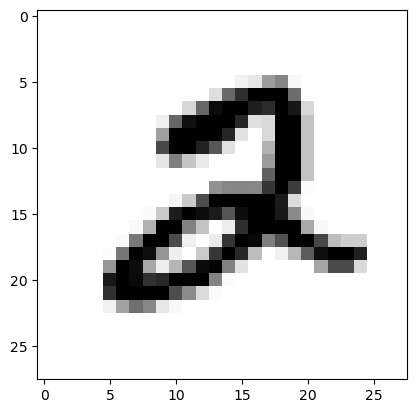

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
images = X.reshape((-1, 28, 28))
plt.imshow(images[5],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

Affichez la classe correspondante à l’image affichée.

In [4]:
# TODO
print ("Classe correspondante: ",mnist.target[5])

Classe correspondante:  2


3. Explore other datasets

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

In [5]:
# TODO

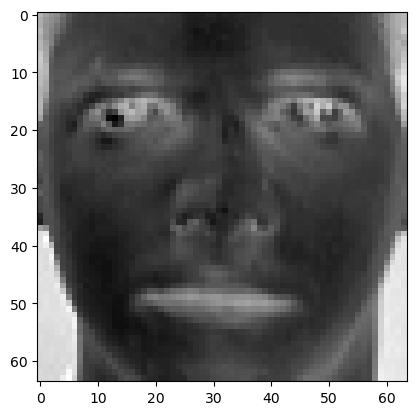

0


In [6]:
# SOLUTION
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

X_olivetti=np.asarray(olivetti.data)
images_olivetti = X_olivetti.reshape((-1, 64, 64))
plt.imshow(images_olivetti[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(olivetti.target[0])

## About fetch olivetti dataset
fetch_olivetti_faces() from the sklearn.dataset module is used to load or fetch Olivetti faces dataset in your program. This dataset is specialized for classification problems.
Dataset overview

There are 10 different 64x64 images in Olivetti faces dataset each of which has 40 distinct subjects or classes. The subjects are lighting conditions, facial expressions etc. Moreover, it contains 400 samples (no_of_images*classes) with dimensionality of 4096. The target or predicting values are integers between 0 & 39 indicating the identity of the person.

Classes
40

Total samples
400

# 2. The k-Nearest Neighbors (k-NN) method

The k-NN method is a very intuitive algorithm, which can be parametrized and often has a good performance on clasification problems.

The k-NN method requires:
- an integer k
- a training dataset
- a proximity/similarity/distance measure

The principle of the algorithm is the following:
For a new unlabelled example x, find the k labelled samples from the training dataset which are the closest with respect to the chosen measure (the neighbors). The class associated to x is then the one appearing most often among the neighbors (majority/consensus).

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider the Euclidian distance as proximity measure and k=5 neighbors.

<img src="https://miro.medium.com/v2/resize:fit:488/1*9h-WczF6csbeut5vsvjSUA.gif" alt="k-NN example" />

Among the 5 nearest neighbors, 4 belong to ω1 and 1 belongs to ω3, so x is affected to ω1, the class of the majority.

### Information:
We use the library sklearn.neighbors to execute an example of this classification algorithm.

The command **train_test_split**, implemented in **model_selection** in **sklearn** allows to divide the dataset in two: one training set and one test set:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=pourcentage_de_données)

Exemple percentage of data = 0.7 (70%)

The algorithm k-NN is implemented in a package called **neighbors**.
Here are the main commands:
- The line **clf = neighbors.KNeighborsClassifier(n_neighbors)** creates an object of type classifier based on the n_neighbors closest neighbors,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.predict_proba()** allows to estimate the probability of the proposed classification,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 2: The method of the k-NN

- Import the dataset

In [7]:
#Test random array
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import sklearn
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:

mnist = fetch_openml('mnist_784')

X_complete=np.asarray(mnist.data)
y_complete=np.asarray(mnist.target)

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


- Extract a data sample named X with a size of 5000 examples using the function **np.random.randint(70000, size=5000)**, with the corresponding labels y.

In [9]:
# TODO

nr=np.random.randint(70000, size=5000)
X_random=X_complete[nr]
Y_random=y_complete[nr]

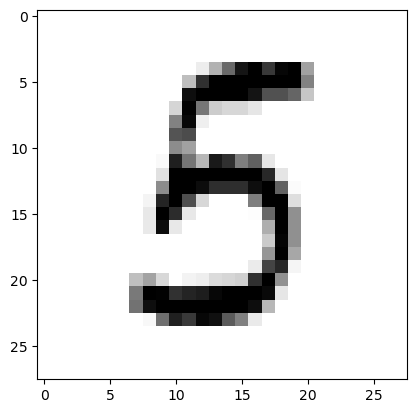

5


In [10]:

images = X_random.reshape((-1, 28, 28))
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(Y_random[0])

- Divide the database in 80% for training and 20% for test.

In [11]:
# TODO

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_random, Y_random, test_size=0.2)


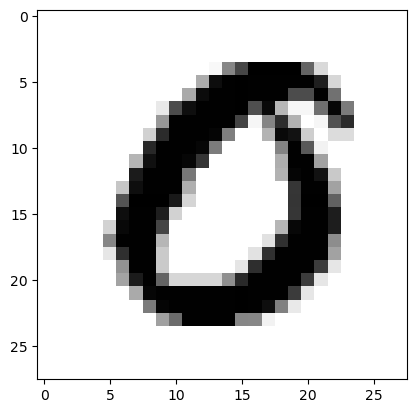

0
Training size:  4000


In [12]:
#Test to check dataset
images = X_train.reshape((-1, 28, 28))
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(y_train[0])
print("Training size: ", len(X_train))

- Train a k-NN classifier with k = 10 on the training set.

In [13]:
# TODO
k=10
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

- Display image 4, the class of image 4 and its predicted class

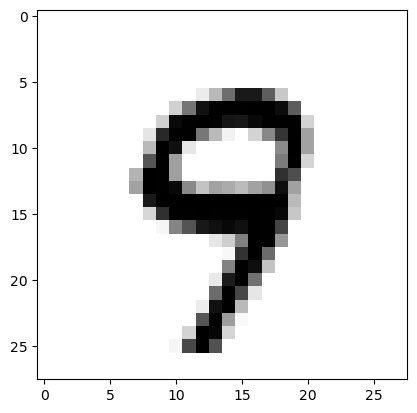

defined class: 9
Predicted class:  9
Probability of predicted class:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
# TODO
#Check image
i=1

images = X_test.reshape((-1, 28, 28))
plt.imshow(images[i],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print("defined class:",y_test[i])
#Check predicted
y_predicted=clf.predict(X_test)
y_predicted_proba=clf.predict_proba(X_test)
print("Predicted class: ", y_predicted[i])
print("Probability of predicted class: ", y_predicted_proba[i])

- Display the score on the test set

In [15]:
# TODO
score=clf.score(X_test, y_test)
print("Score of KNN algo: ",score)

Score of KNN algo:  0.926


- What is the error rate for the training set ? Is it normal ? Underfitting/Overfitting ?

In [16]:
# TODO
y_pred_train=clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

##Accuracy report

print(f'Accuracy in training dataset: {accuracy_train:.2f}')

print('Accuracy report in training dataset:')
print(classification_report(y_train, y_pred_train))

print('Confusion matrix for training dataset:')
print(confusion_matrix(y_train, y_pred_train))



Accuracy in training dataset: 0.94
Accuracy report in training dataset:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       410
           1       0.86      1.00      0.93       404
           2       0.99      0.92      0.95       409
           3       0.95      0.94      0.94       425
           4       0.96      0.93      0.94       396
           5       0.95      0.93      0.94       381
           6       0.97      0.98      0.97       386
           7       0.94      0.95      0.95       414
           8       0.97      0.86      0.91       383
           9       0.89      0.93      0.91       392

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

Confusion matrix for training dataset:
[[402   1   0   0   0   3   3   0   1   0]
 [  0 403   1   0   0   0   0   0   0   0]
 [  4  16 375   3   0   0   0   5   4   2]
 

In [17]:
# TODO
y_pred_test=clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

##Accuracy report

print(f'Accuracy in test dataset: {accuracy_test:.2f}')

print('Accuracy report in test dataset:')
print(classification_report(y_test, y_pred_test))

print('Confusion matrix for test dataset:')
print(confusion_matrix(y_test, y_pred_test))

Accuracy in test dataset: 0.93
Accuracy report in test dataset:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       103
           1       0.86      0.98      0.91       104
           2       0.97      0.86      0.91       107
           3       0.89      0.93      0.91        94
           4       0.97      0.99      0.98        99
           5       0.91      0.91      0.91        88
           6       0.95      0.96      0.95        99
           7       0.90      0.96      0.93        92
           8       0.97      0.85      0.90       106
           9       0.94      0.85      0.89       108

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

Confusion matrix for test dataset:
[[102   0   0   0   0   0   0   0   1   0]
 [  0 102   1   0   0   0   0   0   0   1]
 [  3   6  92   1   1   0   0   2   1   1]
 [  0   1   1

### Response

In this case, the model is well-trained. We can observe that it performs well on the training dataset, achieving an accuracy of 95%. The confusion matrix aligns consistently with this result, indicating the absence of underfitting. Finally, similar outcomes are observed for the test dataset, with an accuracy of 93%, indicating a performance comparable to that on the training set. Consequently, the classifier demonstrates responsiveness to unseen data, and in conclusion, it is a balanced classifier without overfitting or underfitting.

- Vary the percentage of samples (training and test) and display the score. What is the remarkable percentage ?

Score of KNN with  0.95  percentage for training 0.928
Score of KNN with  0.9  percentage for training 0.938
Score of KNN with  0.85  percentage for training 0.9267643142476698
Score of KNN with  0.8  percentage for training 0.922
Score of KNN with  0.75  percentage for training 0.92
Score of KNN with  0.7  percentage for training 0.9246666666666666
Score of KNN with  0.65  percentage for training 0.916
Score of KNN with  0.6  percentage for training 0.9135
Score of KNN with  0.55  percentage for training 0.9155555555555556
Score of KNN with  0.5  percentage for training 0.9064
Score of KNN with  0.45  percentage for training 0.893090909090909
Score of KNN with  0.4  percentage for training 0.8966666666666666
Score of KNN with  0.35  percentage for training 0.8846153846153846
Score of KNN with  0.3  percentage for training 0.8834618680377035
Score of KNN with  0.25  percentage for training 0.8781658224473474
Score of KNN with  0.2  percentage for training 0.876030992251937
Score of KNN

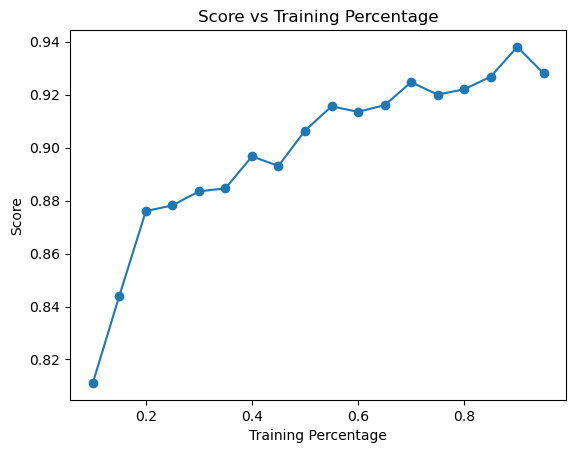

In [18]:
# TODO
j=0.05
# Lists to store the values
training_percentages = []
scores = []

while(j<0.95):
    test_size=j
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_random, Y_random, test_size=j)
    clf.fit(X_train,y_train)
    y_predicted=clf.predict(X_test)
    y_predicted_proba=clf.predict_proba(X_test)
    score=clf.score(X_test, y_test)
    print("Score of KNN with ",round((1-j),2)," percentage for training", score)
    training_percentages.append(1 - j)
    scores.append(score)
    j=j+0.05
    
plt.plot(training_percentages, scores, marker='o')
plt.xlabel('Training Percentage')
plt.ylabel('Score')
plt.title('Score vs Training Percentage')
plt.show()

### Response
It is intuitive to expect better performance and precision with a larger training dataset. It can be stated that the highest precision is achieved when utilizing 90% of the data for training, but there is an increased risk of overfitting. 

- Vary the number of neighbors (k) from 2 to 15 and display the scores as a curve (one curve for training and one for test). What is the optimal k ? Implement two approaches:
    - use a loop on k using the training and test datasets,
    - use a K-fold validation as implemented with the functions **kf = KFold(len(X), n_folds=10, shuffle=True, random_state=42)** and **kf.split(X)** from sklearn.model_selection. Let's remind that the score for a particular model (one choice of k) is obtained as the average score over all folds.

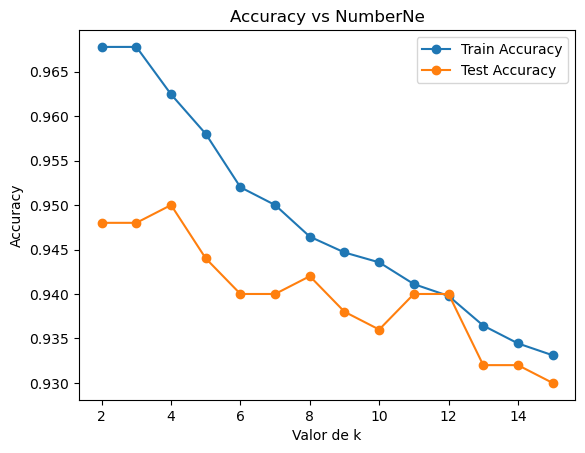

In [19]:
# TODO
## Use a loop
from sklearn.model_selection import KFold
## Use a K-fold validation

# Display scores
# plt.plot(scores_train)
# plt.plot(scores_train)
# plt.xlabel("k")
# plt.ylabel("Score")
# plt.show()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_random, Y_random, test_size=0.15)
k_values = []
accuracy_train_values = []
accuracy_test_values = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)
k=2
for train, test in kf.split(X_random):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]    
    while(k<=15):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train,y_train)
        y_pred_train=clf.predict(X_train)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        y_pred_test=clf.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        k_values.append(k)
        accuracy_train_values.append(accuracy_train)
        accuracy_test_values.append(accuracy_test)
        k+=1

plt.plot(k_values, accuracy_train_values, label='Train Accuracy', marker='o')
plt.plot(k_values, accuracy_test_values, label='Test Accuracy', marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs NumberNe')
plt.legend()
plt.show()

### Response

It is observed that with 4 neighbors, there is a good prediction percentage for the training set, and it is the best for the test set.

- Still using K-fold, vary the type of distance used. What is the best distance in our case ?

In [ ]:
# TODO

accuracy_train_values = []
accuracy_test_values = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)
k=4
distances=list(range(1, 41))

d=1
for d in (range(4)):
    print(d)
    if d == 0: 
        d=0.1
    for train, test in kf.split(X_random):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]    
        #
        clf = KNeighborsClassifier(n_neighbors=k, p=d)
        clf.fit(X_train,y_train)
        y_pred_train=clf.predict(X_train)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        y_pred_test=clf.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train_values.append(accuracy_train)
        accuracy_test_values.append(accuracy_test)

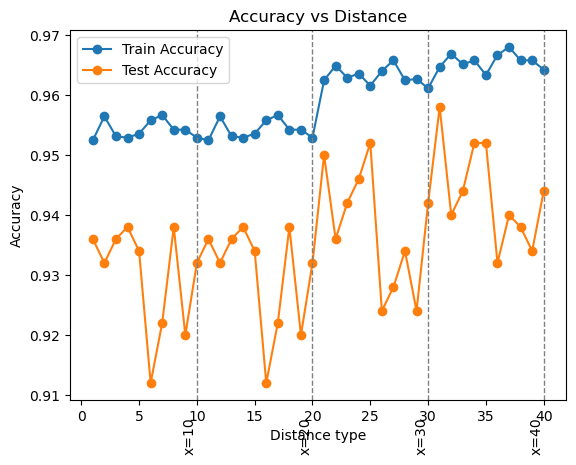

In [33]:
plt.plot(distances, accuracy_train_values, label='Train Accuracy', marker='o')
plt.plot(distances, accuracy_test_values, label='Test Accuracy', marker='o')

for x_value in [10, 20, 30, 40]:
    plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=1)
    plt.text(x_value, 0.9, f'distance={x_value}', rotation=90, ha='right', va='bottom')

plt.xlabel('Distance type')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Distance')
plt.legend()
plt.show()

## Response
In each intervale of 10 points we changed the distance value, between 0 and 10 we have a distance close to 0, between 

- Fixez n_job à 1 puis à -1 et calculez le temps de chacun.

In [ ]:
#TODO

import time

kf = KFold(n_splits=10, shuffle=True, random_state=42)
k=4

start_time = time.time()
for train, test in kf.split(X_random):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]    
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
    clf.fit(X_train,y_train)
end_time = time.time()
execution_time = end_time - start_time
print("Time taken by n_jobs=1: ", execution_time)


start_time = time.time()
for train, test in kf.split(X_random):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]    
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    clf.fit(X_train,y_train)
    
end_time = time.time()
execution_time = end_time - start_time
print("Time taken by n_jobs=-1: ", execution_time)
    



- In your opinion, what are the advantages and disadvantages of the k-NN method: optimality ? computation time ? scalability ?

# 3. The Support Vector Machines (SVM) method

The SVM is a method finding a linear separation between 2 classes of samples in an augmented space using kernel functions, while optimizing the margin between the 2 classes. This method can have a good performance on clasification problems.

The SVM method requires:
- a kernel (e.g. Gaussian)
- a training dataset

The SVM method is designed for binary classification and it is possible to perform multi-class classification by using several "one-vs-rest" binary classification. The Support Vector Classification method automatically perform this multi-class approach.

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider several Kernels

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" alt="SVM" />

The results are highly dependent on the choice of this kernel.

### Information:
The algorithm SVC is implemented in a package called **sklearn.svm**: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.

In order for the SVM method to perform well, the data needs to be centered. This can be performed using the **StandardScaler** function in the package sklearn.preprocessing. The main commands are then:
- scaler = StandardScaler()
- X_train = scaler.fit_transform(X_train)
- X_test = scaler.transform(X_test)

Then to get the SVC classifier, here are the main commands:
- The line **clf = SVC(kernel='rbf', decision_function_shape='ovr')** creates an object of type classifier based on the Gaussian kernel,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 3: The SVC method

- Just like before: import the data and extract a data sample named X with a size of 5000 examples.

In [ ]:
# TODO

- Inspired by the previous work on the k-NN: use K-fold validation in order to decide which kernel gives the best results for our classification problem using an SVC classifier. Do not forget to scale the data.

In [ ]:
# TODO

- In your opinion, what are the advantages and disadvantages of the SVM method: optimality ? computation time ? scalability ?

### Complementary definitions from the medical domain:
We define:
- TP (true positives) represents the number of ill individuals with a positive test,
- FP (faux positives) represents the number of healthy individuals with a positive test,
- TP (true negatives) represents the number of ill individuals with a negative test,
- FP (faux negatives) represents the number of healthy individuals with a negative test.

Two measures allow to judge the quality of a classifier:
1. **Sensitivity** (or *true positive rate, recall, probability of detection*): probability that the test is positive when the illness is present = proportion of positives correctly identified = TP/(TP+FN).
2. **Specificity** (or *true negative rate*): probability that the test is negative when the patient is healthy = proportion of negatives correctly identified = TN/(VP+FN).